# Трансформация t-SNE

Есть [подробная статья на хабре](https://habr.com/ru/post/267041/).

Алгоритм нужен, когда PCA плохо работает. Мы знаем, что алгоритм PCA (или SVD) хорошо сжимает данные, в которых наблюдается линейная зависимость. Но часто данные больших размерностей содержат сложные нелинейные преобразования. Давай посмотрим, как работает t-sne из коробки на датасете по сегментации клиентов из домашней работы

In [3]:
import pandas as pd

df_source = pd.read_csv('client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

df_source.head()

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0.0
1,-0.889273,-0.537896,-1.959469,2.0
2,-0.841503,0.846665,0.727606,0.0
3,1.389749,0.390911,1.789246,1.0
4,-1.228211,-1.375899,-1.434209,2.0


Выполним сжатие данных, пользуясь реализацией `sklearn.manifold.TSNE`:

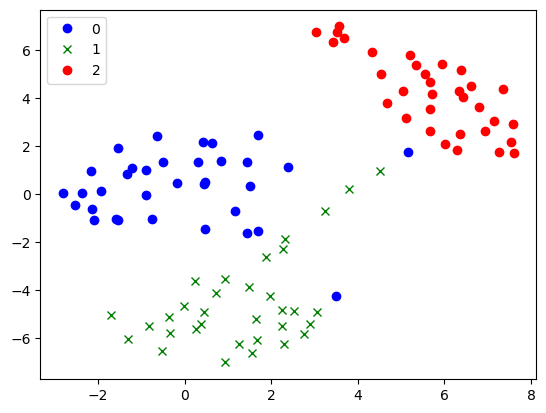

In [10]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

tsne_transformer = TSNE(n_components=2)

x_tsne = tsne_transformer.fit_transform(X)

colors = ['bo', 'gx', 'ro']
num_labels = len(colors)
# И нарисуем получившиеся точки в нашем новом пространстве
for name, label, color in [('class_%d' % i, i, colors[i]) for i in range(num_labels)]:
    plt.plot(x_tsne[y == label, 0], x_tsne[y == label, 1], color, label=label)
plt.legend(loc=0)


Готово! Визуально данные стали более разделимы, чем  в домашней работе про PCA, там кластеры выглядели сильнее "перемешанными", между ними больше пространства:

![classification_dim_reduction](https://248006.selcdn.ru/public/DS.%20Block%202.%20M8/classification_dim_reduction.png)